## 日频数据的Q统计量


数据说明： 使用20210101-20220101的五千只个股，每日的分钟级的开盘价数据  
Q统计量:$Q = n(n+2)\sum_{k=1}^h \frac{1}{n-k}q_k^2$

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
open_2021 = pd.read_hdf('/mnt/datadisk2/aglv/aglv/lab_aglv/open_2021.h5')
open_2021

InstrumentID,Date,EndTime,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
0,20210104,09:31,9.64,14.10,8.95,12.45,2.86,75.70,1.17,4.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210104,09:32,9.64,14.01,8.82,12.35,2.86,76.46,1.18,4.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210104,09:33,9.60,13.97,8.84,12.36,2.84,76.17,1.17,4.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210104,09:34,9.60,14.00,8.83,12.37,2.85,76.10,1.17,4.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210104,09:35,9.58,13.90,8.83,12.33,2.85,75.74,1.17,4.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58315,20211231,14:56,8.55,12.04,6.81,14.41,3.41,46.68,2.78,9.64,...,30.31,41.48,36.95,69.92,104.04,60.49,32.14,27.39,20.23,2.45
58316,20211231,14:57,8.54,12.03,6.81,14.41,3.40,46.68,2.79,9.65,...,30.28,41.51,36.93,70.00,103.70,60.32,32.12,27.40,20.30,2.45
58317,20211231,14:58,8.55,12.03,6.81,14.39,3.41,46.70,2.79,9.65,...,30.20,41.48,36.73,70.05,103.20,60.05,32.09,27.39,20.25,2.45
58318,20211231,14:59,8.55,12.03,6.81,14.39,3.41,46.70,2.79,9.65,...,30.20,41.48,36.73,70.05,103.30,60.02,32.09,27.39,20.19,2.45


In [3]:
open_2021 = open_2021.set_index(['Date', 'EndTime'])
open_2021

InstrumentID      SH600000  SH600004  SH600006  SH600007  SH600008  SH600009  \
Date     EndTime                                                               
20210104 09:31        9.64     14.10      8.95     12.45      2.86     75.70   
         09:32        9.64     14.01      8.82     12.35      2.86     76.46   
         09:33        9.60     13.97      8.84     12.36      2.84     76.17   
         09:34        9.60     14.00      8.83     12.37      2.85     76.10   
         09:35        9.58     13.90      8.83     12.33      2.85     75.74   
...                    ...       ...       ...       ...       ...       ...   
20211231 14:56        8.55     12.04      6.81     14.41      3.41     46.68   
         14:57        8.54     12.03      6.81     14.41      3.40     46.68   
         14:58        8.55     12.03      6.81     14.39      3.41     46.70   
         14:59        8.55     12.03      6.81     14.39      3.41     46.70   
         15:00        8.55     12.03      6.81     14.39      3.41     46.70   

InstrumentID      SH600010  SH600011  SH600012  SH600015  ...  SZ301190  \
Date     EndTime                                          ...             
20210104 09:31        1.17      4.50      6.14      6.22  ...       NaN   
         09:32        1.18      4.49      6.12      6.22  ...       NaN   
         09:33        1.17      4.47      6.16      6.20  ...       NaN   
         09:34        1.17      4.47      6.17      6.21  ...       NaN   
         09:35        1.17      4.46      6.16      6.21  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
20211231 14:56        2.78      9.64      7.07      5.59  ...     30.31   
         14:57        2.79      9.65      7.07      5.59  ...     30.28   
         14:58        2.79      9.65      7.06      5.60  ...     30.20   
         14:59        2.79      9.65      7.06      5.60  ...     30.20   
         15:00        2.79      9.65      7.06      5.60  ...     30.20   

InstrumentID      SH688210  SH688206  SH688265  SZ301166  SZ301189  SH688227  \
Date     EndTime                                                               
20210104 09:31         NaN       NaN       NaN       NaN       NaN       NaN   
         09:32         NaN       NaN       NaN       NaN       NaN       NaN   
         09:33         NaN       NaN       NaN       NaN       NaN       NaN   
         09:34         NaN       NaN       NaN       NaN       NaN       NaN   
         09:35         NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
20211231 14:56       41.48     36.95     69.92    104.04     60.49     32.14   
         14:57       41.51     36.93     70.00    103.70     60.32     32.12   
         14:58       41.48     36.73     70.05    103.20     60.05     32.09   
         14:59       41.48     36.73     70.05    103.30     60.02     32.09   
         15:00       41.48     36.73     70.05    103.30     60.02     32.09   

InstrumentID      SH688236  SZ301127  SH603176  
Date     EndTime                                
20210104 09:31         NaN       NaN       NaN  
         09:32         NaN       NaN       NaN  
         09:33         NaN       NaN       NaN  
         09:34         NaN       NaN       NaN  
         09:35         NaN       NaN       NaN  
...                    ...       ...       ...  
20211231 14:56       27.39     20.23      2.45  
         14:57       27.40     20.30      2.45  
         14:58       27.39     20.25      2.45  
         14:59       27.39     20.19      2.45  
         15:00       27.39     20.19      2.45  

[58320 rows x 4622 columns]

In [12]:
tqdm.pandas()

def q_stats(data:pd.DataFrame, h=10):
    '''时序自相关性Q统计量,针对每天生成因子'''
    n = len(data)
    data = (data - data.mean()) / (data.std() +1e-10)
    # corr_list = pd.DataFrame(index=range(h), columns=data.columns)
    # step = 2
    # for loc in range(h):
    #     k = step * loc + 1
    #     corr_list.iloc[loc] = 1/(n-k) * data.corrwith(data.shift(-k))

    # for k in range(1, h+1):
    #     corr_list.iloc[k-1] = 1/(n-k) * data.corrwith(data.shift(-k))
    # def q_stats_series():
    #     res = 0

    # return corr_list.sum()

    lagged_data = np.array([data.shift(-k).fillna(0).values for k in range(1, h + 1)])
    rho_squared_sum = np.sum((np.einsum('ijk,jk->ik', lagged_data, data.values))**2 / (n - np.arange(1, h + 1))[:, None], axis=0)
    
    return pd.Series(rho_squared_sum, index=data.columns)

def q_stats_df(df:pd.DataFrame):
    '''df为multi-index对象'''
    # date_index = df.index.get_level_values('Date').unique()
    # res = pd.DataFrame(index=date_index, columns=df.columns)
    # for day in tqdm(date_index.to_list()):
    #     data_oneday = df.xs(day, level='Date')
    #     data_oneday = (data_oneday - data_oneday.mean()) / (data_oneday.std() + 1e-10) #z-score
    #     res.loc[day] = q_stats(data_oneday)
        
    return df.groupby(level='Date').progress_apply(q_stats)

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [13]:
factor = q_stats_df(open_2021)

In [14]:
factor

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,2046.916811,989.297354,721.121880,1786.852739,265.016008,767.653128,200.451400,1080.612709,1401.371159,1618.933773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,1770.552337,1196.785634,620.798872,2100.338343,563.085943,726.022835,146.185214,1133.437588,1567.860123,1943.344634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,1285.949256,2158.180478,1260.489118,2047.131885,152.218921,1766.425887,11.951340,1549.980851,1906.503627,544.673859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,1660.476761,2074.952442,1635.861194,883.924842,1317.037264,2074.423988,504.363997,1776.112552,1602.840167,1713.584985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,1373.459624,1654.953518,1040.657961,1779.677327,1825.687872,1623.478011,18.809600,1331.372865,1010.771711,773.022096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,583.200238,1771.198468,1473.525729,729.983154,1630.630491,1597.265604,1611.587951,2041.940774,2055.679939,137.858780,...,1620.838267,1887.422998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211228,705.290152,1703.618216,1547.128144,1616.028889,666.128419,1736.866981,1614.400126,504.367913,1316.314795,304.776109,...,1228.143253,1463.090231,1454.896339,1159.275377,1236.535564,659.817132,NaN,NaN,NaN,NaN
20211229,255.503142,1528.916331,381.246794,1345.040869,1335.322020,1827.236259,1709.507814,1665.475288,1483.298416,306.180630,...,1628.585632,1656.652106,966.373256,1199.313096,1346.765507,1212.481366,NaN,NaN,NaN,NaN


In [18]:
factor.reset_index(inplace=True)
factor

InstrumentID,Date,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
0,20210104,2046.916811,989.297354,721.121880,1786.852739,265.016008,767.653128,200.451400,1080.612709,1401.371159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210105,1770.552337,1196.785634,620.798872,2100.338343,563.085943,726.022835,146.185214,1133.437588,1567.860123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210106,1285.949256,2158.180478,1260.489118,2047.131885,152.218921,1766.425887,11.951340,1549.980851,1906.503627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210107,1660.476761,2074.952442,1635.861194,883.924842,1317.037264,2074.423988,504.363997,1776.112552,1602.840167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210108,1373.459624,1654.953518,1040.657961,1779.677327,1825.687872,1623.478011,18.809600,1331.372865,1010.771711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,20211227,583.200238,1771.198468,1473.525729,729.983154,1630.630491,1597.265604,1611.587951,2041.940774,2055.679939,...,1620.838267,1887.422998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,20211228,705.290152,1703.618216,1547.128144,1616.028889,666.128419,1736.866981,1614.400126,504.367913,1316.314795,...,1228.143253,1463.090231,1454.896339,1159.275377,1236.535564,659.817132,NaN,NaN,NaN,NaN
240,20211229,255.503142,1528.916331,381.246794,1345.040869,1335.322020,1827.236259,1709.507814,1665.475288,1483.298416,...,1628.585632,1656.652106,966.373256,1199.313096,1346.765507,1212.481366,NaN,NaN,NaN,NaN
241,20211230,804.424635,2014.008212,1651.705916,742.494843,142.941622,2081.446823,1851.585849,1457.826669,1755.653502,...,1111.172608,1253.524142,1990.673069,1575.563942,724.804288,2128.918273,970.984090,1607.620254,1179.823154,NaN


In [19]:
factor.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/q_states_h10_min.csv',index=False)

In [20]:
f = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/q_states_h10_min.csv')
f

,Date,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
0,20210104,2046.916811,989.297354,721.121880,1786.852739,265.016008,767.653128,200.451400,1080.612709,1401.371159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210105,1770.552337,1196.785634,620.798872,2100.338343,563.085943,726.022835,146.185214,1133.437588,1567.860123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210106,1285.949256,2158.180478,1260.489118,2047.131885,152.218921,1766.425887,11.951340,1549.980851,1906.503627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210107,1660.476761,2074.952442,1635.861194,883.924842,1317.037264,2074.423988,504.363997,1776.112552,1602.840167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210108,1373.459624,1654.953518,1040.657961,1779.677327,1825.687872,1623.478011,18.809600,1331.372865,1010.771711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,20211227,583.200238,1771.198468,1473.525729,729.983154,1630.630491,1597.265604,1611.587951,2041.940774,2055.679939,...,1620.838267,1887.422998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,20211228,705.290152,1703.618216,1547.128144,1616.028889,666.128419,1736.866981,1614.400126,504.367913,1316.314795,...,1228.143253,1463.090231,1454.896339,1159.275377,1236.535564,659.817132,NaN,NaN,NaN,NaN
240,20211229,255.503142,1528.916331,381.246794,1345.040869,1335.322020,1827.236259,1709.507814,1665.475288,1483.298416,...,1628.585632,1656.652106,966.373256,1199.313096,1346.765507,1212.481366,NaN,NaN,NaN,NaN
241,20211230,804.424635,2014.008212,1651.705916,742.494843,142.941622,2081.446823,1851.585849,1457.826669,1755.653502,...,1111.172608,1253.524142,1990.673069,1575.563942,724.804288,2128.918273,970.984090,1607.620254,1179.823154,NaN


Q统计量的标准差，h=15

In [5]:
def q_stats_std(df:pd.DataFrame,h=10,step=1):
    '''
    df:为multi-index对象, 两级索引['Date', 'EndTime']  
    h:求和的窗口数,默认=h  
    step:滞后时期的回望步长,默认=1  
    返回:$\sum_{k=1}^h q_k^2$
    '''

    def _q_stats_std(data:pd.DataFrame, h=h):
        '''时序自相关性Q统计量,针对每天生成因子'''
        n = len(data)
        data = (data - data.mean()) / (data.std() +1e-10)
        lagged_data = np.array([data.shift(-k).fillna(0).values for k in range(1, step*h + 1, step)])
        q_stats = np.einsum('ijk,jk->ik', lagged_data, data.values)
        rho_squared_sum = np.std(q_stats, axis=0)
        
        return pd.Series(rho_squared_sum, index=data.columns)
        
    return df.groupby(level='Date').progress_apply(_q_stats_std)

In [6]:
factor2 = q_stats_std(open_2021)

In [7]:
factor2

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,8.250324,37.989877,61.152561,12.785015,17.871174,63.943408,23.171643,30.060810,28.647392,10.417046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,18.171522,35.587988,47.273438,7.239530,17.800136,43.159818,19.228900,18.242454,22.851646,10.937400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,22.623166,5.199817,33.497030,10.540752,25.118989,17.334817,16.723223,20.364412,12.802234,46.784256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,15.087878,9.867761,22.900405,33.324966,10.674831,7.002514,18.789629,13.562588,17.814553,13.031926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,22.850875,22.761467,26.127464,15.918835,14.653636,17.867593,11.490588,26.081360,46.964481,27.557908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,15.209267,17.643307,22.224452,60.545502,10.563696,19.502710,16.983358,11.267585,6.528126,16.231111,...,14.659003,14.258525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211228,14.841375,19.656523,16.843303,22.142279,28.137305,11.803085,16.337070,50.178466,23.722135,24.154703,...,27.202329,22.209058,11.755523,33.604877,38.968733,43.356459,NaN,NaN,NaN,NaN
20211229,32.697592,18.725947,25.777222,28.477564,17.386710,16.260933,11.745814,14.932788,24.261260,21.793251,...,18.817339,18.892806,28.816698,32.740365,27.334276,32.194880,NaN,NaN,NaN,NaN


In [16]:
factor2 = factor2.drop(columns=['index', 'level_0'])
factor2

InstrumentID,Date,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
0,20210104,8.250324,37.989877,61.152561,12.785015,17.871174,63.943408,23.171643,30.060810,28.647392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210105,18.171522,35.587988,47.273438,7.239530,17.800136,43.159818,19.228900,18.242454,22.851646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210106,22.623166,5.199817,33.497030,10.540752,25.118989,17.334817,16.723223,20.364412,12.802234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210107,15.087878,9.867761,22.900405,33.324966,10.674831,7.002514,18.789629,13.562588,17.814553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210108,22.850875,22.761467,26.127464,15.918835,14.653636,17.867593,11.490588,26.081360,46.964481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,20211227,15.209267,17.643307,22.224452,60.545502,10.563696,19.502710,16.983358,11.267585,6.528126,...,14.659003,14.258525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,20211228,14.841375,19.656523,16.843303,22.142279,28.137305,11.803085,16.337070,50.178466,23.722135,...,27.202329,22.209058,11.755523,33.604877,38.968733,43.356459,NaN,NaN,NaN,NaN
240,20211229,32.697592,18.725947,25.777222,28.477564,17.386710,16.260933,11.745814,14.932788,24.261260,...,18.817339,18.892806,28.816698,32.740365,27.334276,32.194880,NaN,NaN,NaN,NaN
241,20211230,14.100326,9.184864,10.477036,50.972764,12.952572,10.655794,6.837864,24.675358,9.152123,...,31.584035,37.125713,12.786024,25.425081,48.088134,8.215384,45.058076,23.331687,33.684373,NaN


In [17]:
# factor2 = factor2.reset_index()
factor2.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/q_states_std_h10_step1_min.csv',index=False)

In [19]:
factor3 = q_stats_std(open_2021, h=15, step=2)

In [20]:
factor3

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,21.062079,91.634230,72.782705,27.065399,48.433464,90.117540,22.053959,37.774649,40.940557,22.569329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,40.197743,84.959674,59.703999,26.383504,28.732558,37.934394,24.455900,42.202347,40.666353,36.257810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,35.259241,20.859980,56.376668,42.421305,24.569926,45.104017,10.802277,63.440289,37.774340,61.317016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,44.727026,25.632527,35.184204,60.696010,36.291868,18.134778,44.551505,51.105027,33.467973,36.442423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,36.008101,66.931463,56.119857,44.462282,40.623251,33.941070,14.264353,60.829909,74.085868,53.166688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,31.081511,30.577333,62.126188,76.149733,32.083538,32.229016,44.883658,39.041342,31.189433,32.884504,...,39.043419,33.976579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211228,24.864323,52.822141,42.914193,60.011364,46.921987,30.439320,37.498426,57.430147,66.768181,42.270440,...,60.417270,42.675331,34.147999,51.385939,95.800080,53.188009,NaN,NaN,NaN,NaN
20211229,42.348043,51.773969,42.619976,70.510302,38.548543,61.860083,26.628350,25.914322,67.905663,33.441185,...,42.897526,55.481175,65.076103,43.953590,59.657673,61.586971,NaN,NaN,NaN,NaN


In [21]:
factor3 = factor3.reset_index()
factor3.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/q_states_std_h15_step2_min.csv' ,index=False)

### 计算日度数据的偏度

In [5]:
def skew_daily(df:pd.DataFrame):
    def _skew_daily(data:pd.DataFrame):
        data = data.pct_change()
        data = (data - data.mean()) / (data.std() + 1e-10).fillna(0)
        return data.skew()
    
    return df.groupby(level='Date').progress_apply(_skew_daily)

In [6]:
factor4 = skew_daily(open_2021)

In [7]:
factor4

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,0.036921,-0.085169,0.538345,-0.818787,-0.150605,0.730584,0.011014,0.071699,0.716700,0.131469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,0.144371,0.634870,-0.982711,-0.327447,0.077652,-0.856478,0.015809,-0.207885,0.370819,0.188791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,0.335434,0.297977,0.543388,-0.218844,0.015914,-0.034498,0.015415,-0.106563,0.445449,0.298365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,-0.366963,0.185526,0.690138,0.053736,-0.129156,0.628775,0.085202,0.097639,-0.136973,-0.371027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,-0.002315,0.279533,-0.478794,0.335134,0.853980,0.323397,0.012845,0.001558,-0.103894,-0.124876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,-0.139391,0.538429,-0.659351,0.207460,-0.089148,-0.447363,0.017798,0.154301,-0.383715,0.079410,...,-1.132198,-0.985860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211228,0.124992,0.260695,-0.166784,-0.001544,0.022117,0.521233,0.230849,-0.670820,1.187250,0.002313,...,0.551603,-2.060628,-9.152399,0.263862,1.965447,-2.665030,NaN,NaN,NaN,NaN
20211229,-0.196031,4.718532,-0.521357,0.478560,0.135758,0.794641,0.361380,-0.971587,0.370964,0.000143,...,0.099980,0.104447,-0.094276,2.709142,0.174695,0.743911,NaN,NaN,NaN,NaN


In [18]:
factor4 = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/skew_min.csv')
# factor4 = factor4.reset_index()
# factor4 = factor4.drop(columns=['index'])
factor4
# factor4.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/skew_min.csv', index=False)

,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
0,0.036921,-0.085169,0.538345,-0.818787,-0.150605,0.730584,0.011014,0.071699,0.716700,0.131469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.144371,0.634870,-0.982711,-0.327447,0.077652,-0.856478,0.015809,-0.207885,0.370819,0.188791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.335434,0.297977,0.543388,-0.218844,0.015914,-0.034498,0.015415,-0.106563,0.445449,0.298365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.366963,0.185526,0.690138,0.053736,-0.129156,0.628775,0.085202,0.097639,-0.136973,-0.371027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.002315,0.279533,-0.478794,0.335134,0.853980,0.323397,0.012845,0.001558,-0.103894,-0.124876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-0.139391,0.538429,-0.659351,0.207460,-0.089148,-0.447363,0.017798,0.154301,-0.383715,0.079410,...,-1.132198,-0.985860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,0.124992,0.260695,-0.166784,-0.001544,0.022117,0.521233,0.230849,-0.670820,1.187250,0.002313,...,0.551603,-2.060628,-9.152399,0.263862,1.965447,-2.665030,NaN,NaN,NaN,NaN
240,-0.196031,4.718532,-0.521357,0.478560,0.135758,0.794641,0.361380,-0.971587,0.370964,0.000143,...,0.099980,0.104447,-0.094276,2.709142,0.174695,0.743911,NaN,NaN,NaN,NaN
241,-0.043868,0.433831,0.260204,-0.160166,0.073996,0.164243,0.011948,0.124001,0.008411,-0.067795,...,0.048493,1.412118,-0.602528,0.068362,0.156902,0.521479,0.859422,-2.942280,1.002538,NaN


In [12]:
factor4.index

Index(['20210104', '20210105', '20210106', '20210107', '20210108', '20210111',
       '20210112', '20210113', '20210114', '20210115',
       ...
       '20211220', '20211221', '20211222', '20211223', '20211224', '20211227',
       '20211228', '20211229', '20211230', '20211231'],
      dtype='object', name='Date', length=243)

In [20]:
# factor4.set_index(['Date'])
# factor4 = factor4.rolling(5).mean().fillna(0)
# factor4
# factor4 = factor4.reset_index()
f = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/skew_r5mean_min.csv')
f

,Date,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
0,20210104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20210105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20210106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20210107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20210108,0.029490,0.262547,0.062073,-0.195242,0.133557,0.158356,0.028057,-0.028710,0.258420,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,20211227,0.111787,0.502231,-0.037202,-0.060486,0.037197,0.656765,0.084729,0.612341,-0.212637,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,20211228,0.047517,0.095484,-0.108074,-0.204912,0.037676,0.575714,0.068787,0.428648,-0.029169,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,20211229,0.018006,1.114216,-0.284671,-0.206630,0.044999,0.460082,0.126694,0.001881,0.071995,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,20211230,-0.048372,1.147362,-0.224252,-0.083359,0.033949,0.331084,0.093226,-0.061937,0.246434,...,0.315363,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
open_2021

InstrumentID      SH600000  SH600004  SH600006  SH600007  SH600008  SH600009  \
Date     EndTime                                                               
20210104 09:31        9.64     14.10      8.95     12.45      2.86     75.70   
         09:32        9.64     14.01      8.82     12.35      2.86     76.46   
         09:33        9.60     13.97      8.84     12.36      2.84     76.17   
         09:34        9.60     14.00      8.83     12.37      2.85     76.10   
         09:35        9.58     13.90      8.83     12.33      2.85     75.74   
...                    ...       ...       ...       ...       ...       ...   
20211231 14:56        8.55     12.04      6.81     14.41      3.41     46.68   
         14:57        8.54     12.03      6.81     14.41      3.40     46.68   
         14:58        8.55     12.03      6.81     14.39      3.41     46.70   
         14:59        8.55     12.03      6.81     14.39      3.41     46.70   
         15:00        8.55     12.03      6.81     14.39      3.41     46.70   

InstrumentID      SH600010  SH600011  SH600012  SH600015  ...  SZ301190  \
Date     EndTime                                          ...             
20210104 09:31        1.17      4.50      6.14      6.22  ...       NaN   
         09:32        1.18      4.49      6.12      6.22  ...       NaN   
         09:33        1.17      4.47      6.16      6.20  ...       NaN   
         09:34        1.17      4.47      6.17      6.21  ...       NaN   
         09:35        1.17      4.46      6.16      6.21  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
20211231 14:56        2.78      9.64      7.07      5.59  ...     30.31   
         14:57        2.79      9.65      7.07      5.59  ...     30.28   
         14:58        2.79      9.65      7.06      5.60  ...     30.20   
         14:59        2.79      9.65      7.06      5.60  ...     30.20   
         15:00        2.79      9.65      7.06      5.60  ...     30.20   

InstrumentID      SH688210  SH688206  SH688265  SZ301166  SZ301189  SH688227  \
Date     EndTime                                                               
20210104 09:31         NaN       NaN       NaN       NaN       NaN       NaN   
         09:32         NaN       NaN       NaN       NaN       NaN       NaN   
         09:33         NaN       NaN       NaN       NaN       NaN       NaN   
         09:34         NaN       NaN       NaN       NaN       NaN       NaN   
         09:35         NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
20211231 14:56       41.48     36.95     69.92    104.04     60.49     32.14   
         14:57       41.51     36.93     70.00    103.70     60.32     32.12   
         14:58       41.48     36.73     70.05    103.20     60.05     32.09   
         14:59       41.48     36.73     70.05    103.30     60.02     32.09   
         15:00       41.48     36.73     70.05    103.30     60.02     32.09   

InstrumentID      SH688236  SZ301127  SH603176  
Date     EndTime                                
20210104 09:31         NaN       NaN       NaN  
         09:32         NaN       NaN       NaN  
         09:33         NaN       NaN       NaN  
         09:34         NaN       NaN       NaN  
         09:35         NaN       NaN       NaN  
...                    ...       ...       ...  
20211231 14:56       27.39     20.23      2.45  
         14:57       27.40     20.30      2.45  
         14:58       27.39     20.25      2.45  
         14:59       27.39     20.19      2.45  
         15:00       27.39     20.19      2.45  

[58320 rows x 4622 columns]

### 使用标准化收益率计算q_states

In [24]:
def q_stats_return_powersum(df:pd.DataFrame,h=10):
    '''
    df:为multi-index对象, 两级索引['Date', 'EndTime']  
    h:求和的窗口数，  
    返回:$\sum_{k=1}^h q_k^2$
    '''

    def _q_stats_powersum(data:pd.DataFrame, h=h):
        '''时序自相关性Q统计量,针对每天生成因子'''
        n = len(data)
        data = data.pct_change()
        data = (data - data.mean()) / (data.std() + 1e-10).fillna(0)
        lagged_data = np.array([data.shift(-k).fillna(0).values for k in range(1, h + 1)])
        rho_squared_sum = np.sum((np.einsum('ijk,jk->ik', lagged_data, data.values))**2 / (n - np.arange(1, h + 1))[:, None], axis=0)
        
        return pd.Series(rho_squared_sum, index=data.columns)
        
    return df.groupby(level='Date').progress_apply(_q_stats_powersum)

In [25]:
f = q_stats_return_powersum(open_2021)

In [26]:
f

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 计算高波收益率

In [33]:
def high_std_mean(df:pd.DataFrame, std_window=10, mean_window=5, std_p=0.8):
    def _high_std_mean(data:pd.DataFrame, s_w=std_window, m_w=mean_window, std_p=std_p):
        def _for_series(s:pd.Series):
            s_std = s.rolling(s_w).std().fillna(0)
            p_value = s_std.quantile(std_p)
            mean_sum = s[s_std > p_value].rolling(m_w).mean().sum()
            return mean_sum
        
        return data.apply(_for_series)
    
    return df.groupby(level='Date').progress_apply(_high_std_mean)

In [34]:
factor5 = high_std_mean(open_2021)

In [35]:
factor5

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,424.254,617.552,410.562,544.210,122.974,3407.896,35.214,197.212,268.988,272.908,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
20210105,422.556,605.726,387.842,534.698,119.702,3375.210,50.112,193.536,266.742,273.928,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
20210106,428.566,604.536,376.952,557.658,85.260,3437.684,50.064,192.508,285.024,269.026,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
20210107,419.632,583.096,370.470,546.690,115.238,3358.150,42.534,194.692,272.608,261.378,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
20210108,431.810,578.512,364.238,543.038,126.150,3361.240,50.102,196.128,269.730,268.616,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,367.846,506.824,301.158,619.848,149.770,2006.260,123.416,440.676,306.008,240.218,...,1444.814,2123.306,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
20211228,359.810,517.214,302.304,621.002,143.914,2017.992,122.944,415.314,308.798,218.070,...,1348.292,1801.978,1939.138,3196.580,4925.638,2633.238,0.000,0.000,0.000,0.0
20211229,359.046,526.114,301.362,628.696,144.396,2032.060,123.678,397.702,309.746,246.124,...,1434.130,1770.816,1726.668,3138.118,5614.530,2607.810,0.000,0.000,0.000,0.0


In [38]:
factor5.index

Index(['20210104', '20210105', '20210106', '20210107', '20210108', '20210111',
       '20210112', '20210113', '20210114', '20210115',
       ...
       '20211220', '20211221', '20211222', '20211223', '20211224', '20211227',
       '20211228', '20211229', '20211230', '20211231'],
      dtype='object', name='Date', length=243)

In [41]:
factor5_zs = factor5.apply(lambda x: (x - x.mean()) / (x.std() + 1e-10), axis=1)
# factor5_zs['Date'] = factor5['Date']
factor5_zs

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,-0.219054,-0.134635,-0.225034,-0.166665,-0.350633,1.084000,-0.388961,-0.318211,-0.286864,-0.285152,...,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340
20210105,-0.221956,-0.142978,-0.236924,-0.173603,-0.352539,1.051156,-0.382545,-0.320704,-0.289139,-0.286041,...,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152
20210106,-0.216102,-0.140888,-0.238163,-0.160925,-0.362840,1.070069,-0.377884,-0.316999,-0.277456,-0.284294,...,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282
20210107,-0.214597,-0.145134,-0.235488,-0.160605,-0.343947,1.034106,-0.374842,-0.310184,-0.277074,-0.281846,...,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917
20210108,-0.208441,-0.145425,-0.237467,-0.160663,-0.339738,1.049904,-0.372405,-0.309679,-0.278063,-0.278542,...,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,-0.329102,-0.274702,-0.355205,-0.230462,-0.414462,0.312214,-0.424778,-0.300594,-0.353307,-0.379059,...,0.092450,0.358029,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086
20211228,-0.334653,-0.273206,-0.357101,-0.232690,-0.418933,0.312657,-0.427119,-0.312985,-0.354566,-0.389984,...,0.051224,0.228331,0.281874,0.772745,1.447723,0.552832,-0.475113,-0.475113,-0.475113,-0.475113
20211229,-0.337820,-0.272361,-0.360422,-0.232168,-0.421923,0.317688,-0.430040,-0.322674,-0.357137,-0.382065,...,0.083411,0.215329,0.198031,0.751055,1.721344,0.543274,-0.478499,-0.478499,-0.478499,-0.478499


In [49]:
factor5_zs_rm = factor5_zs.rolling(5).mean().fillna(0)

In [50]:
factor5_zs_rm.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/high_std_mean_rm5_sw10_mw5_stdp0.8_min.csv')

In [48]:
df = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/high_std_mean_sw10_mw5_stdp0.8_min.csv')
df

,Date,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
0,20210104,-0.219054,-0.134635,-0.225034,-0.166665,-0.350633,1.084000,-0.388961,-0.318211,-0.286864,...,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340,-0.404340
1,20210105,-0.221956,-0.142978,-0.236924,-0.173603,-0.352539,1.051156,-0.382545,-0.320704,-0.289139,...,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152,-0.404152
2,20210106,-0.216102,-0.140888,-0.238163,-0.160925,-0.362840,1.070069,-0.377884,-0.316999,-0.277456,...,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282,-0.399282
3,20210107,-0.214597,-0.145134,-0.235488,-0.160605,-0.343947,1.034106,-0.374842,-0.310184,-0.277074,...,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917,-0.392917
4,20210108,-0.208441,-0.145425,-0.237467,-0.160663,-0.339738,1.049904,-0.372405,-0.309679,-0.278063,...,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927,-0.393927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,20211227,-0.329102,-0.274702,-0.355205,-0.230462,-0.414462,0.312214,-0.424778,-0.300594,-0.353307,...,0.092450,0.358029,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086,-0.473086
239,20211228,-0.334653,-0.273206,-0.357101,-0.232690,-0.418933,0.312657,-0.427119,-0.312985,-0.354566,...,0.051224,0.228331,0.281874,0.772745,1.447723,0.552832,-0.475113,-0.475113,-0.475113,-0.475113
240,20211229,-0.337820,-0.272361,-0.360422,-0.232168,-0.421923,0.317688,-0.430040,-0.322674,-0.357137,...,0.083411,0.215329,0.198031,0.751055,1.721344,0.543274,-0.478499,-0.478499,-0.478499,-0.478499
241,20211230,-0.340486,-0.273480,-0.365998,-0.235667,-0.374711,0.329156,-0.432831,-0.322205,-0.362660,...,0.063183,0.225137,0.176800,0.769790,1.592816,0.624761,0.090476,0.016676,-0.096501,-0.480990


### 条件分布的另一因子-多空博弈

In [61]:
def long_short_return(df:pd.DataFrame, mean_window=5, sum_window=15):
    '''
    日内单侧行情, 衡量多空博弈力量
    '''
    def _long_short_return(data:pd.DataFrame):
        data = data.pct_change().fillna(0)
        # data_mean = data.rolling(mean_window).mean().fillna(0)
        data_mean_sum = data.rolling(mean_window).sum().fillna(0)
        return data_mean_sum.max()
    
    return df.groupby(level='Date').progress_apply(_long_short_return)

In [62]:
factor8 = long_short_return(open_2021)

In [63]:
factor8

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
Date,,,,,,,,,,,,,,,,,,,,,
20210104,0.009340,0.010738,0.035818,0.004867,0.007054,0.017926,0.017241,0.015585,0.009847,0.004852,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
20210105,0.005236,0.010188,0.015913,0.004855,0.007055,0.009833,0.008768,0.004582,0.016614,0.011252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
20210106,0.011388,0.012435,0.018303,0.010977,0.007079,0.012659,0.008768,0.006907,0.024192,0.008013,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
20210107,0.006124,0.006732,0.030160,0.015577,0.007130,0.007158,0.017315,0.011307,0.006472,0.003239,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
20210108,0.007141,0.013115,0.020404,0.005675,0.017618,0.011155,0.008694,0.011405,0.016543,0.004797,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211227,0.002342,0.019527,0.007327,0.015644,0.005926,0.013986,0.021885,0.037011,0.002888,0.003581,...,0.058752,0.047113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
20211228,0.003507,0.016121,0.004373,0.009934,0.005997,0.010705,0.014506,0.017177,0.012898,0.003584,...,0.024047,0.021595,0.038900,0.044050,0.108977,0.117016,0.000000,0.000000,0.000000,0.00000
20211229,0.003513,0.016372,0.004388,0.007690,0.011923,0.008402,0.014286,0.018668,0.005670,0.003584,...,0.040890,0.012823,0.015764,0.044040,0.052417,0.042933,0.000000,0.000000,0.000000,0.00000


In [64]:
factor8.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/min_corr/long_rs5_min.csv')

### 正态性检验

In [65]:
open_2021

InstrumentID      SH600000  SH600004  SH600006  SH600007  SH600008  SH600009  \
Date     EndTime                                                               
20210104 09:31        9.64     14.10      8.95     12.45      2.86     75.70   
         09:32        9.64     14.01      8.82     12.35      2.86     76.46   
         09:33        9.60     13.97      8.84     12.36      2.84     76.17   
         09:34        9.60     14.00      8.83     12.37      2.85     76.10   
         09:35        9.58     13.90      8.83     12.33      2.85     75.74   
...                    ...       ...       ...       ...       ...       ...   
20211231 14:56        8.55     12.04      6.81     14.41      3.41     46.68   
         14:57        8.54     12.03      6.81     14.41      3.40     46.68   
         14:58        8.55     12.03      6.81     14.39      3.41     46.70   
         14:59        8.55     12.03      6.81     14.39      3.41     46.70   
         15:00        8.55     12.03      6.81     14.39      3.41     46.70   

InstrumentID      SH600010  SH600011  SH600012  SH600015  ...  SZ301190  \
Date     EndTime                                          ...             
20210104 09:31        1.17      4.50      6.14      6.22  ...       NaN   
         09:32        1.18      4.49      6.12      6.22  ...       NaN   
         09:33        1.17      4.47      6.16      6.20  ...       NaN   
         09:34        1.17      4.47      6.17      6.21  ...       NaN   
         09:35        1.17      4.46      6.16      6.21  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
20211231 14:56        2.78      9.64      7.07      5.59  ...     30.31   
         14:57        2.79      9.65      7.07      5.59  ...     30.28   
         14:58        2.79      9.65      7.06      5.60  ...     30.20   
         14:59        2.79      9.65      7.06      5.60  ...     30.20   
         15:00        2.79      9.65      7.06      5.60  ...     30.20   

InstrumentID      SH688210  SH688206  SH688265  SZ301166  SZ301189  SH688227  \
Date     EndTime                                                               
20210104 09:31         NaN       NaN       NaN       NaN       NaN       NaN   
         09:32         NaN       NaN       NaN       NaN       NaN       NaN   
         09:33         NaN       NaN       NaN       NaN       NaN       NaN   
         09:34         NaN       NaN       NaN       NaN       NaN       NaN   
         09:35         NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
20211231 14:56       41.48     36.95     69.92    104.04     60.49     32.14   
         14:57       41.51     36.93     70.00    103.70     60.32     32.12   
         14:58       41.48     36.73     70.05    103.20     60.05     32.09   
         14:59       41.48     36.73     70.05    103.30     60.02     32.09   
         15:00       41.48     36.73     70.05    103.30     60.02     32.09   

InstrumentID      SH688236  SZ301127  SH603176  
Date     EndTime                                
20210104 09:31         NaN       NaN       NaN  
         09:32         NaN       NaN       NaN  
         09:33         NaN       NaN       NaN  
         09:34         NaN       NaN       NaN  
         09:35         NaN       NaN       NaN  
...                    ...       ...       ...  
20211231 14:56       27.39     20.23      2.45  
         14:57       27.40     20.30      2.45  
         14:58       27.39     20.25      2.45  
         14:59       27.39     20.19      2.45  
         15:00       27.39     20.19      2.45  

[58320 rows x 4622 columns]

In [69]:
d_210604 = open_2021.xs('20210604', level='Date')
d_210604

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301190,SH688210,SH688206,SH688265,SZ301166,SZ301189,SH688227,SH688236,SZ301127,SH603176
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,10.25,11.70,7.74,19.16,3.13,51.20,1.64,4.16,6.89,6.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:32,10.27,11.68,7.88,18.80,3.13,51.74,1.63,4.16,6.90,6.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:33,10.26,11.67,7.84,18.92,3.11,51.41,1.63,4.16,6.92,6.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:34,10.26,11.65,7.75,18.92,3.11,51.15,1.64,4.17,6.90,6.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:35,10.24,11.65,7.72,18.86,3.11,51.42,1.64,4.17,6.88,6.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,10.25,11.60,7.63,18.56,3.11,50.78,1.62,4.15,6.90,6.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14:57,10.25,11.58,7.63,18.58,3.11,50.77,1.62,4.15,6.90,6.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14:58,10.25,11.59,7.62,18.53,3.10,50.76,1.63,4.15,6.87,6.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
d_210604 = d_210604.pct_change().fillna(0)
r_array = d_210604.values.flatten()
r_array

array([0., 0., 0., ..., 0., 0., 0.])

In [86]:
r_non_zero = r_array[r_array != 0]

In [73]:
np.max(r_array)

0.14585834333733483

In [90]:
import matplotlib.pyplot as plt
left, right = -0.01, 0.01
n = 300
step = (right - left) / n
l_list = np.arange(left, right, step)
r_list = l_list + step
p_list = zip(l_list, r_list)

v = pd.Series(index=pd.Series(l_list))
for i in range(len(l_list)):
    v.loc[l_list[i]] = np.sum((r_non_zero >= l_list[i] )&( r_non_zero <= r_list[i]))

v

<ipython-input-90-f22b7a209670>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  v = pd.Series(index=pd.Series(l_list))


-0.010000    37.0
-0.009933    41.0
-0.009867    56.0
-0.009800    39.0
-0.009733    41.0
             ... 
 0.009667    53.0
 0.009733    55.0
 0.009800    63.0
 0.009867    53.0
 0.009933    66.0
Length: 300, dtype: float64

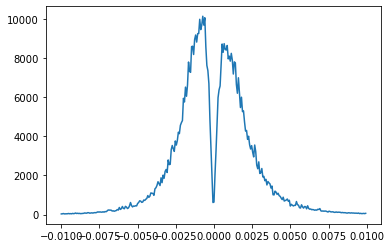

In [91]:
plt.plot(v)
plt.show()

In [85]:
np.sum(r_array == 0) / len(r_array)

0.4220954132410212

In [101]:
a = pd.Series(range(3))
a.rolling(2).mean()


0    NaN
1    0.5
2    1.5
dtype: float64